# $MAPF_R$ environment

$MAPF_R$ environment: a graph $G=(V,E)$, each node is associated with a location in $\mathbb{R}^d$ space, $d\in\{1,2,3\}$. Moreover, each node has a self-loop edge, that is $(s,s)\in E$ for all $s\in V$.

# Definition of a motion plan in $MAPF_R$ environment:

A motion plan is a sequence of (node, time) pairs 
$$
    plan = \{(s_i,t_i): i = 0,1,\ldots, K\}
$$

where $s_i\in V, (s_i,s_{i+1})\in E$, and $t_{i+1}\geq t_i$. An agent following such a plan travels from $s_i$ to $s_{i+1}$ at constant velocity during the time interval $[t_i,t_{i+1}]$. If $s_i=s_{i+1}$, then the agent stays at the same node for the corresponding period.

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.append('../')

sys.path.append('../../')

from panav.util import interpolate_positions

from matplotlib.animation import FuncAnimation

%load_ext autoreload
%autoreload 2

In [2]:
node_locs = np.array([[1,1],
                      [0,2],
                      [1,3],
                      [3,3],
                      [4,2],
                      [3,1]])
N = len(node_locs)

G = nx.Graph()
G.add_nodes_from(range(N))
G.add_edges_from([(0,1),
                  (1,2),
                  (2,3),
                  (3,4),
                  (4,5),
                  (5,0),
                  (0,3)])
G = nx.to_directed(G)

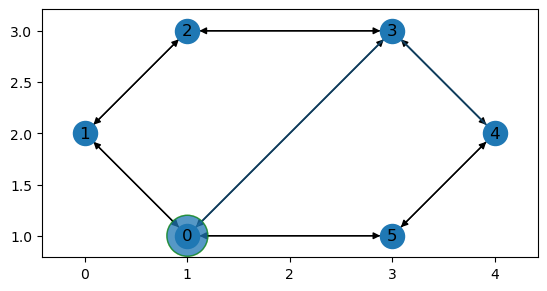

In [5]:
start_node = 0
goal_node = 4

agent_loc = node_locs[start_node]
bloating_r = 0.2

v_max = 1

tau1 = np.linalg.norm(node_locs[0]-node_locs[3])/v_max
tau2 = 1.5
tau3 = np.linalg.norm(node_locs[3]-node_locs[4])/v_max

G_plan = [(0,0),
        (3,tau1),
        (3,tau1+tau2),
        (4,tau1+tau2+tau3)]

x = np.vstack([node_locs[s] for s,t in G_plan]).T
t = np.array([t for s,t in G_plan])

dt = 0.1

t,x = interpolate_positions(t,x,dt)

from matplotlib.patches import Circle
from panav.viz import animation
from panav.env import NavigationEnv

fig = plt.figure()
ax = plt.gca()
nx.draw_networkx(G, {n:node_locs[n] for n in G},ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

disc = Circle(agent_loc,bloating_r,fill = 'green',ec = 'g',alpha=0.5)
ax.add_artist(disc)
ax.set_aspect('equal')

env = NavigationEnv()
anim  = animation(env,[x],bloating_r,dt,fig,ax,[disc])

In [6]:
from IPython.display import HTML, display

display(HTML(anim.to_jshtml()))
plt.close() 

# Compute Unsafe and Safe Intervals

In [9]:
obs_traj = G_plan # obs_traj is also in {(s_i,t_i):i=0,1,...} form.

l = len(G_plan)

In [43]:
nx.set_edge_attributes(G,{e:[] for e in G.edges},'unsafe_intervals')
nx.set_node_attributes(G,{s:[] for s in G},'unsafe_intervals')

In [44]:
for i in range(l-1):
    (u,t1),(v,t2) = G_plan[i],G_plan[i+1]
    
    if u!=v:
        G.edges[v,u]['unsafe_intervals'].append((t1,t2))
    else: # u==v
        G.nodes[u]['unsafe_intervals'].append((t1,t2))

3 3
